# 건물의 위험 수준 체계화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DamageAreaPredict 광주건물.csv", encoding = "ansi")
df

,location,lat,lon,structure,area,height,ground,underground,date,seismic,Score,damage_level1,damage_level2,damage_level3
0,광주광역시 광산구 고룡동 100-1번지,35.204703,126.777928,일반목구조,124.13,5.905713,1,0,1974,0,1.976301,11.141364,11.450870,11.762080
1,광주광역시 광산구 고룡동 1000번지,35.202519,126.777766,일반철골구조,974.70,10.200000,2,0,2016,1,-0.697155,31.220186,31.754745,32.292249
2,광주광역시 광산구 고룡동 1001번지,35.190152,126.773402,일반철골구조,958.17,11.200000,2,0,2016,1,-0.697155,30.954321,31.541288,32.131489
3,광주광역시 광산구 고룡동 1003번지,35.137946,126.791957,일반철골구조,887.92,7.400000,2,0,2016,0,1.339727,29.797987,30.185804,30.575758
4,광주광역시 광산구 고룡동 1005번지,35.190365,126.774364,일반철골구조,331.00,8.200000,1,0,2017,1,-0.879477,18.193405,18.623149,19.055260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122592,광주광역시 북구 오룡동 산 23-1번지,35.214971,126.844826,일반철골구조,19.83,5.905713,1,0,1960,0,2.136058,4.453089,4.762594,5.073804
122593,광주광역시 북구 오룡동 산 24-3번지,35.228358,126.847842,일반철골구조,40.00,5.905713,1,0,1960,0,2.136058,6.324555,6.634061,6.945271
122594,광주광역시 북구 오룡동 산 67번지,35.233707,126.842511,일반철골구조,29.23,5.905713,1,0,1960,0,2.136058,5.406478,5.715983,6.027193
122595,광주광역시 북구 오룡동 산 70번지,35.233860,126.843889,일반철골구조,58.55,5.905713,1,0,1960,0,2.136058,7.651797,7.961302,8.272513


In [5]:
df["Score"].fillna(0, inplace=True)

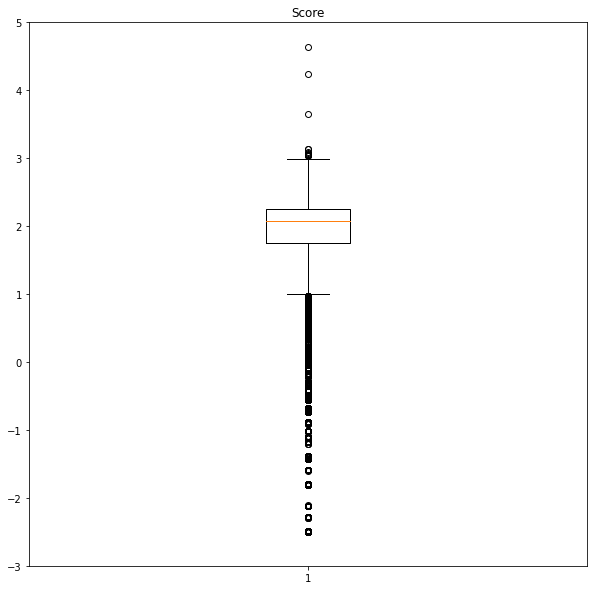

In [6]:
plt.figure(figsize=(10, 10))
plt.boxplot(df["Score"])
plt.xlim(0.5, 1.5)
plt.ylim(-3, 5)
plt.title("Score")
plt.show()

### percentile을 이용하여 레벨링
* level 7 : upper fence 초과
* level 6 : ~75%
* level 5 : ~58%
* level 4 : ~42%
* level 3 : ~25%
* level 2 : ~lower fence
* level 1 : lower fence 이하

In [7]:
np.percentile(df["Score"],[0,25,50,75,100])

array([-2.50103603,  1.74519183,  2.06939121,  2.24918432,  4.62966766])

In [13]:
min = np.percentile(df["Score"],0)      # 최소값
q1 = np.percentile(df["Score"],25)      # 1사분위수
q2 = np.percentile(df["Score"],50)      # 2사분위수
q3 = np.percentile(df["Score"],75)      # 3사분위수
max = np.percentile(df["Score"],100)  # 최대값

per25 = np.percentile(df["Score"], 25)
per42 = np.percentile(df["Score"], 42)
per58 = np.percentile(df["Score"], 58)
per75 = np.percentile(df["Score"], 75)

iqr = q3-q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr

In [14]:
print(min, q1, q2, q3, max, sep = "\n")

-2.501036031717884
1.7451918334117202
2.069391205826334
2.2491843162669305
4.629667657588479


In [15]:
print(lf, uf, sep="\n")

0.9892031091289049
3.005173040549746


In [20]:
def get_risklevel(score):
    if score > uf:
        return 7
    elif score > per75:
        return 6
    elif score > per58:
        return 5
    elif score > per42:
        return 4
    elif score > per25:
        return 3
    elif score > lf:
        return 2
    else:
        return 1

In [18]:
temp = df.copy()
df.columns

Index(['location', 'lat', 'lon', 'structure', 'area', 'height', 'ground',
       'underground', 'date', 'seismic', 'Score', 'damage_level1',
       'damage_level2', 'damage_level3'],
      dtype='object')

In [19]:
temp = df[["location", "lat", "lon", "Score", "damage_level1", "damage_level2", "damage_level3"]]
temp

,location,lat,lon,Score,damage_level1,damage_level2,damage_level3
0,광주광역시 광산구 고룡동 100-1번지,35.204703,126.777928,1.976301,11.141364,11.450870,11.762080
1,광주광역시 광산구 고룡동 1000번지,35.202519,126.777766,-0.697155,31.220186,31.754745,32.292249
2,광주광역시 광산구 고룡동 1001번지,35.190152,126.773402,-0.697155,30.954321,31.541288,32.131489
3,광주광역시 광산구 고룡동 1003번지,35.137946,126.791957,1.339727,29.797987,30.185804,30.575758
4,광주광역시 광산구 고룡동 1005번지,35.190365,126.774364,-0.879477,18.193405,18.623149,19.055260
...,...,...,...,...,...,...,...
122592,광주광역시 북구 오룡동 산 23-1번지,35.214971,126.844826,2.136058,4.453089,4.762594,5.073804
122593,광주광역시 북구 오룡동 산 24-3번지,35.228358,126.847842,2.136058,6.324555,6.634061,6.945271
122594,광주광역시 북구 오룡동 산 67번지,35.233707,126.842511,2.136058,5.406478,5.715983,6.027193
122595,광주광역시 북구 오룡동 산 70번지,35.233860,126.843889,2.136058,7.651797,7.961302,8.272513


In [21]:
temp["risklevel"] = temp.apply(lambda x : get_risklevel(x["Score"]), axis=1)
temp

<ipython-input-21-1081967c3134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["risklevel"] = temp.apply(lambda x : get_risklevel(x["Score"]), axis=1)


,location,lat,lon,Score,damage_level1,damage_level2,damage_level3,risklevel
0,광주광역시 광산구 고룡동 100-1번지,35.204703,126.777928,1.976301,11.141364,11.450870,11.762080,3
1,광주광역시 광산구 고룡동 1000번지,35.202519,126.777766,-0.697155,31.220186,31.754745,32.292249,1
2,광주광역시 광산구 고룡동 1001번지,35.190152,126.773402,-0.697155,30.954321,31.541288,32.131489,1
3,광주광역시 광산구 고룡동 1003번지,35.137946,126.791957,1.339727,29.797987,30.185804,30.575758,2
4,광주광역시 광산구 고룡동 1005번지,35.190365,126.774364,-0.879477,18.193405,18.623149,19.055260,1
...,...,...,...,...,...,...,...,...
122592,광주광역시 북구 오룡동 산 23-1번지,35.214971,126.844826,2.136058,4.453089,4.762594,5.073804,5
122593,광주광역시 북구 오룡동 산 24-3번지,35.228358,126.847842,2.136058,6.324555,6.634061,6.945271,5
122594,광주광역시 북구 오룡동 산 67번지,35.233707,126.842511,2.136058,5.406478,5.715983,6.027193,5
122595,광주광역시 북구 오룡동 산 70번지,35.233860,126.843889,2.136058,7.651797,7.961302,8.272513,5


In [22]:
temp.to_csv("risk leveling 광주건물.csv",sep=",", na_rep="NaN", encoding="ansi", index=False)